## Probability of dying where I come from 
  
    

In [102]:
from __future__ import print_function # will need these to ask about age
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd
import matplotlib.pyplot as plt    # will need this
%matplotlib inline                 
import seaborn as sns               # will need this
import numpy as np                 # will probably not need this, shall check



In [103]:
excel_file = 'mort_data.xlsx'
mort_data = pd.read_excel(excel_file)

In [104]:
mort_data.head()

,Age,Sex,Lx,Tx,lx,dx,qx,ex
0,0,m,68914.0,481.0,100000,698,0.006980,71.96
1,1,m,69476.0,38.0,99302,54,0.000544,71.46
2,2,m,69278.0,21.0,99248,30,0.000302,70.50
3,3,m,68570.0,13.0,99218,19,0.000191,69.52
4,4,m,69013.0,5.0,99199,7,0.000071,68.54


In [105]:
mort_data.tail()

,Age,Sex,Lx,Tx,lx,dx,qx,ex
197,96,f,703.0,221.0,969,446,0.460268,1.46
198,97,f,551.0,199.0,523,267,0.510516,1.28
199,98,f,366.0,129.0,256,145,0.566406,1.09
200,99,f,219.0,76.0,111,70,0.630631,0.87
201,100,f,NaN,NaN,41,41,1.000000,0.50


In [106]:
mort_data.columns

Index(['Age', 'Sex', 'Lx', 'Tx', 'lx', 'dx', 'qx', 'ex'], dtype='object')

The meanings of the column titles are the: 
  
Lx: number of people of certain age #the data are coming from census  
Tx: number of people of ceratin age who died within last 12 months (?) #the data are coming from census
lx: number of living people of certain age (starting from 100000, smoothed)  
dx: number of people of certain age expected to die  
qx: probability of death (smoothed)  
ex: number of additional years that a person of certain age is expected to live (average)

In [107]:
Lx=mort_data['Lx'].tolist()
age_raw=mort_data['Age'].tolist()

men_raw = Lx[:len(Lx)//2]
women = Lx[len(Lx)//2:]
men = [x * (-1) for x in men_raw]
age=age_raw[:len(Lx)//2]


This would be the population pyramid from my country:
  

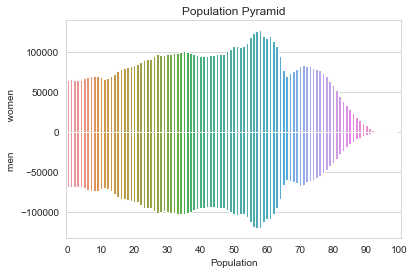

In [108]:
sns.set_style("whitegrid")
sns.color_palette("RdBu")  #, n_colors=4

pm=bar_plot=sns.barplot (y=men, x=age, data=mort_data, label="men")
pw=bar_plot=sns.barplot (y=women, x=age, data=mort_data, label="women")
pm.set(xlabel="Population", ylabel="Age", title = "Population Pyramid")

pm.set(ylabel='men           women')  #is this acceptable as a solution? pure trickery :)


# pm.set(yticks=[-100000,-50000]) 
# pw.set(yticks=[50000,100000])


for label in pm.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
for label in pw.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

So.  Back to the more important stuff.     
What is your probability of dying then?  
  
  
Choose your age on the slider. # still need to add the sex. For now you are female :).
  

In [109]:
output_slider_variable = widgets.Text()

def f(x):
    output_slider_variable.value = str(x)

# interact(f, x=40);  ---> automatic slider is constructed with a range of [−10,+3×10]
interact(f, x=widgets.IntSlider(min=0,max=100,step=1,value=40));

interactive(children=(IntSlider(value=40, description='x'), Output()), _dom_classes=('widget-interact',))

In [110]:
output_slider_variable.value

'40'

In [111]:
the_age = [int(output_slider_variable.value)]    #workaround, as for some reason, df.query won't work with anything but lists

In [112]:
mort_data.query('Age == @the_age and Sex == "f"').iat[0,6]

0.0012031853823172534